# Laboratorium 2: Algorytm Obiektów Połączonych (Connected Components)

**Cel:** Samodzielna implementacja algorytmu wykrywania i zliczania obiektów na obrazie binarnym.

---

## Sekcja 1: Teoria

### Obraz binarny

**Obraz binarny** - obraz, na którym piksele mogą przyjmować tylko jedną z dwóch wartości (0 lub 1, czasami 0 lub 255).

**Binaryzacja (progowanie)** - operacja przekształcająca obraz w skali szarości na obraz binarny:
```
P(x,y) = 1  gdy  I(x,y) >= prog
P(x,y) = 0  gdy  I(x,y) < prog
```

### Sąsiedztwo pikseli

**Sąsiedztwo 4-spójne (N4):**
```
      [G]      
  [L] [*] [P]  
      [D]      
```
Piksel [*] ma 4 sąsiadów: lewy (L), górny (G), prawy, dolny.

**Sąsiedztwo 8-spójne (N8):**
```
  [LG][G][PG] 
  [L] [*] [P] 
  [LD][D][PD] 
```
Piksel [*] ma 8 sąsiadów: 4 bezpośrednie + 4 po przekątnej.

**W tym algorytmie używamy sąsiedztwa 4-spójnego.**

---

### Algorytm obiektów połączonych

Służy do **wykrycia i zliczenia obiektów** na obrazie binarnym.

#### Etap I: Etykietowanie wstępne

1. Inicjalizuj licznik = 0
2. Przeglądaj obraz **wiersz po wierszu, od lewej do prawej**
3. Dla każdego piksela P(x,y) > 0:
   - Jeśli piksel **z lewej** ma wartość > 0: `P(x,y) = P(x-1,y)`
   - Jeśli nie, ale piksel **z góry** ma wartość > 0: `P(x,y) = P(x,y-1)`
   - Jeśli nie: `P(x,y) = ++licznik` (nowa etykieta)

```
Kolejność sprawdzania (N4):
     [góra]
  [lewo][P]
```

#### Etap II: Tablica korelacji (podstawień)

1. Utwórz tablicę COR[256], gdzie `COR[i] = i`
2. Znajdź przyległe piksele o różnych etykietach:
   - Sprawdź górnego sąsiada: jeśli `P(x,y) != P(x,y-1)` i oba > 0
   - Porównaj `COR[P(x,y)]` z `COR[P(x,y-1)]`
   - Jeśli `COR[P(x,y)] > COR[P(x,y-1)]`: `COR[P(x,y)] = COR[P(x,y-1)]`
   - Jeśli `COR[P(x,y)] < COR[P(x,y-1)]`: `COR[P(x,y-1)] = COR[P(x,y)]`
3. Zamień wartości pikseli zgodnie z tablicą COR: `P(x,y) = COR[P(x,y)]`

**Dlaczego dwa warunki?** Tablica COR może być już zaktualizowana z poprzednich iteracji, więc sprawdzamy który reprezentant jest mniejszy i propagujemy mniejszą wartość.

---

### Przykład działania (sąsiedztwo 4-spójne)

```
Obraz binarny:        Po etapie I:         Po etapie II:
  0 0 1 1 0              0 0 1 1 0            0 0 1 1 0
  0 1 1 0 0              0 2 2 0 0            0 1 1 0 0
  0 0 0 1 1              0 0 0 3 3            0 0 0 3 3
  1 1 1 1 0              4 4 4 4 0            3 3 3 3 0
```

**Etap I - wyjaśnienie:**
- Wiersz 0, kol 2: brak sąsiadów → etykieta 1
- Wiersz 0, kol 3: lewy sąsiad = 1 → etykieta 1
- Wiersz 1, kol 1: brak sąsiadów → etykieta 2
- Wiersz 1, kol 2: górny sąsiad = 1 → etykieta 1
- Wiersz 2, kol 3: brak sąsiadów → etykieta 3
- Wiersz 3, kol 0: brak sąsiadów → etykieta 4
- itd.

**Etap II - tablica COR:**
- Wiersz 1, kol 2: etykieta 1, górny = 1 (takie same, OK)
- Wiersz 2, kol 3: etykieta 3, górny = 1 → COR[3] = 1 (konflikt!)
- Wiersz 3, kol 1: etykieta 4, lewy = 4 (takie same, OK)
- Wiersz 3, kol 3: etykieta 3, górny = 3 (takie same, OK)

Finalna tablica COR: `[0, 1, 1, 3, 3, 5, 6, ...]`

**Wynik:** 2 obiekt (etykiety 1,2 → 1; 3,4 → 3 )

---

## Sekcja 2: Kod startowy

### Przypomnienie: pętle i instrukcje warunkowe w Pythonie

In [43]:
# Pętla for - iteracja po zakresie (podobnie jak w C/C++)
for i in range(5):  # i = 0, 1, 2, 3, 4
    print(f"i = {i}")

# Pętla zagnieżdżona (jak w C: for(j=0; j<rows; j++) for(i=0; i<cols; i++))
rows, cols = 3, 4
for j in range(rows):
    for i in range(cols):
        print(f"({j},{i})", end=" ")
    print()  # nowa linia

# Instrukcja warunkowa if-elif-else
x = 5
if x > 10:
    print("x > 10")
elif x > 0:
    print("x > 0")
else:
    print("x <= 0")

# Dostęp do tablicy 2D (jak w C: matrix[j][i])
import numpy as np
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print(f"matrix[0][1] = {matrix[0][1]}")  # wiersz 0, kolumna 1 -> 2

i = 0
i = 1
i = 2
i = 3
i = 4
(0,0) (0,1) (0,2) (0,3) 
(1,0) (1,1) (1,2) (1,3) 
(2,0) (2,1) (2,2) (2,3) 
x > 0
matrix[0][1] = 2


In [44]:
# Import bibliotek
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Funkcje pomocnicze

In [45]:
def wczytaj_obraz(sciezka):
    """Wczytuje obraz z pliku."""
    img = Image.open(sciezka)
    return np.array(img)

def rgb_do_szarosci(obraz_rgb):
    """Konwersja RGB -> skala szarości."""
    if len(obraz_rgb.shape) == 2:  # już w skali szarości
        return obraz_rgb
    # Wzór: 0.299*R + 0.587*G + 0.114*B
    return (0.299 * obraz_rgb[:,:,0] + 
            0.587 * obraz_rgb[:,:,1] + 
            0.114 * obraz_rgb[:,:,2]).astype(np.uint8)

def binaryzacja(obraz_szary, prog=128):
    """Binaryzacja: piksel >= prog -> 1, reszta -> 0."""
    return (obraz_szary >= prog).astype(np.uint8)

def wyswietl_obrazy(obrazy, tytuly, cmap_list=None):
    """Wyświetla wiele obrazów obok siebie."""
    n = len(obrazy)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axes = [axes]
    for i, (obraz, tytul) in enumerate(zip(obrazy, tytuly)):
        cmap = cmap_list[i] if cmap_list else 'gray'
        axes[i].imshow(obraz, cmap=cmap)
        axes[i].set_title(tytul)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

### Przykładowe obrazy testowe

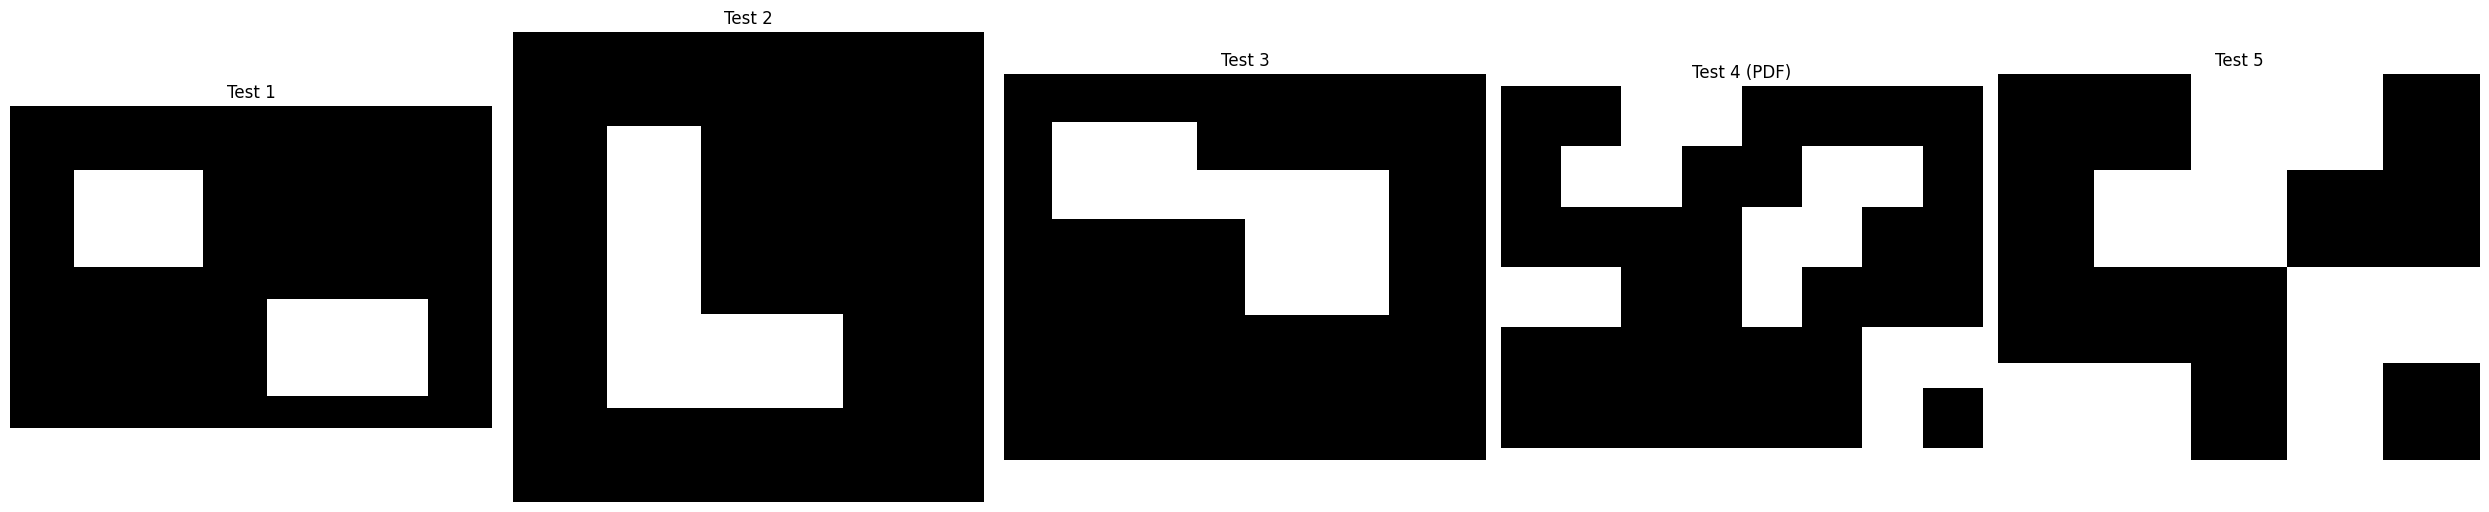

In [46]:
# Test 1: Dwa oddzielne prostokąty
test1 = np.zeros((10, 15), dtype=np.uint8)
test1[2:5, 2:6] = 1    # prostokąt 1
test1[6:9, 8:13] = 1   # prostokąt 2

# Test 2: Kształt L (jeden obiekt)
test2 = np.zeros((10, 10), dtype=np.uint8)
test2[2:8, 2:4] = 1    # pionowa część
test2[6:8, 2:7] = 1    # pozioma część

# Test 3: Dwa obiekty z "mostem" (konflikt etykiet)
test3 = np.zeros((8, 10), dtype=np.uint8)
test3[1:3, 1:4] = 1    # lewy górny
test3[2, 3:6] = 1      # most łączący
test3[2:5, 5:8] = 1    # prawy dolny

# Test 4: Z instrukcji (przykład z PDF)
test4 = np.array([
    [0, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 0],
    [1, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
], dtype=np.uint8)

# Test 5: Mały przykład do ręcznej weryfikacji
test5 = np.array([
    [0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [1, 1, 0, 1, 0],
], dtype=np.uint8)

# Wyświetlenie
wyswietl_obrazy([test1, test2, test3, test4, test5], 
                ['Test 1', 'Test 2', 'Test 3', 'Test 4 (PDF)', 'Test 5'])

---
## Sekcja 3: Zadania do implementacji

### Zadanie 3.1: Etap I - Etykietowanie wstępne

Zaimplementuj pierwszy przebieg algorytmu zgodnie z instrukcją.

In [47]:
def etap1_etykietowanie(obraz_binarny):
    """
    Etap I: Etykietowanie wstępne (sąsiedztwo 4-spójne).
    
    Algorytm:
    - Dla każdego piksela > 0:
      1. Jeśli lewy sąsiad > 0: przepisz jego etykietę
      2. Jeśli nie, ale górny sąsiad > 0: przepisz jego etykietę
      3. Jeśli nie: przypisz nową etykietę (++licznik)
    
    Args:
        obraz_binarny: tablica 2D z wartościami 0 lub 1
    
    Returns:
        etykiety: tablica 2D z etykietami (0 = tło)
    """
    rows, cols = obraz_binarny.shape
    etykiety = np.zeros((rows, cols), dtype=np.int32)
    
    # TODO: Inicjalizuj licznik
    licznik = 0
    
    # TODO: Pętla po wszystkich pikselach (j - wiersze, i - kolumny)
    for j in range(rows):
        for i in range(cols):
            
            # TODO: Sprawdź czy piksel jest obiektem (> 0)
            if obraz_binarny[j][i] > 0:
                
                # TODO: Sprawdź lewego sąsiada (i-1)
                if i > 0 and etykiety[j][i-1] > 0:
                    etykiety[j][i] = etykiety[j][i-1]
                
                # TODO: Jeśli nie, sprawdź górnego sąsiada (j-1)
                elif j > 0 and etykiety[j-1][i] > 0:
                    etykiety[j][i] = etykiety[j-1][i]
                
                # TODO: Jeśli nie, przypisz nową etykietę
                else:
                    licznik += 1
                    etykiety[j][i] = licznik
    
    return etykiety

#### Test Zadania 3.1

=== TEST ETAPU I ===

Test na małym przykładzie (test5):
Obraz binarny:
[[0 0 1 1 0]
 [0 1 1 0 0]
 [0 0 0 1 1]
 [1 1 0 1 0]]

Etykiety po etapie I:
[[0 0 1 1 0]
 [0 2 2 0 0]
 [0 0 0 3 3]
 [4 4 0 3 0]]

Obserwacja: Mogą wystąpić różne etykiety dla tego samego obiektu.
To jest normalne - etap II to naprawi.



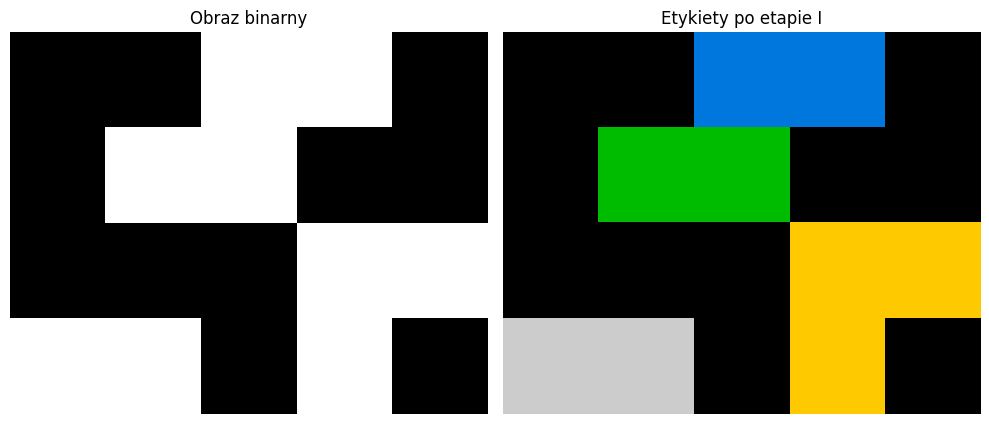

In [48]:
print("=== TEST ETAPU I ===")
print("\nTest na małym przykładzie (test5):")
print("Obraz binarny:")
print(test5)

etykiety_etap1 = etap1_etykietowanie(test5)
print("\nEtykiety po etapie I:")
print(etykiety_etap1)
print("\nObserwacja: Mogą wystąpić różne etykiety dla tego samego obiektu.")
print("To jest normalne - etap II to naprawi.\n")

# Wizualizacja
wyswietl_obrazy([test5, etykiety_etap1], 
                ['Obraz binarny', 'Etykiety po etapie I'],
                ['gray', 'nipy_spectral'])

### Zadanie 3.2: Etap II - Tablica korelacji (podstawień)

Zaimplementuj drugi przebieg z tablicą COR.

**Ważne:** Sprawdzamy dwa warunki:
- Jeśli `COR[aktualna] > COR[górna]`: `COR[aktualna] = COR[górna]`
- Jeśli `COR[aktualna] < COR[górna]`: `COR[górna] = COR[aktualna]`

Dzięki temu propagujemy najmniejszą etykietę w obu kierunkach.

In [51]:
def etap2_tablica_korelacji(etykiety):
    """
    Etap II: Tablica korelacji (podstawień).
    
    Algorytm:
    1. Utwórz tablicę COR[256], gdzie COR[i] = i
    2. Znajdź przyległe piksele o różnych etykietach
    3. Porównaj COR[aktualna] z COR[górna] i zapisz mniejszą
    4. Zamień etykiety zgodnie z tablicą COR
    
    Args:
        etykiety: tablica 2D z etykietami z etapu I
    
    Returns:
        etykiety_finalne: tablica 2D z ostatecznymi etykietami
    """
    rows, cols = etykiety.shape
    
    # TODO: Utwórz tablicę korelacji COR[256]
    COR = np.arange(256, dtype=np.int32)
    
    # TODO: Szukanie różnic między sąsiadami
    # Sprawdzamy górnego sąsiada dla każdego piksela
    
    for j in range(rows):
        for i in range(cols):
            
            # TODO: Sprawdź górnego sąsiada
            if j > 0:
                etykieta_aktualna = etykiety[j][i]
                etykieta_gorna = etykiety[j-1][i]
                
                # TODO: Jeśli oba > 0 i różne
                if etykieta_aktualna > 0 and etykieta_gorna > 0:
                    
                    # TODO: Porównaj COR[aktualna] z COR[gorna]
                    # Warunek 1: jeśli COR[aktualna] > COR[gorna]
                    if COR[etykieta_aktualna] > COR[etykieta_gorna]:
                        COR[etykieta_aktualna] = COR[etykieta_gorna]
                    
                    # TODO: Warunek 2: jeśli COR[aktualna] < COR[gorna]
                    elif COR[etykieta_aktualna] < COR[etykieta_gorna]:
                        COR[etykieta_gorna] = COR[etykieta_aktualna]
    
    # TODO: Zastosuj tablicę podstawień do całego obrazu
    etykiety_finalne = np.zeros_like(etykiety)
    
    for j in range(rows):
        for i in range(cols):
            # TODO: Zamień etykietę zgodnie z tablicą COR
            etykiety_finalne[j][i] = COR[etykiety[j][i]]
    
    return etykiety_finalne

#### Test Zadania 3.2

=== TEST ETAPU II ===

Test na małym przykładzie (test5):
Etykiety po etapie I:
[[0 0 1 1 0]
 [0 2 2 0 0]
 [0 0 0 3 3]
 [4 4 0 3 0]]

Etykiety po etapie II:
[[0 0 1 1 0]
 [0 1 1 0 0]
 [0 0 0 3 3]
 [4 4 0 3 0]]

Obserwacja: Wszystkie piksele tego samego obiektu mają teraz tę samą etykietę.



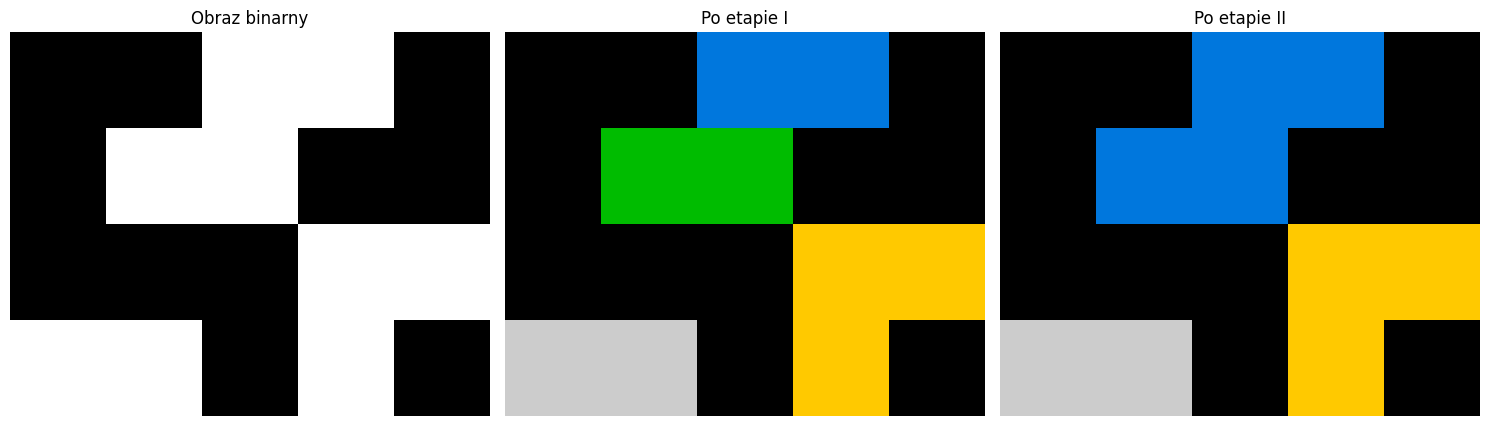

In [52]:
print("=== TEST ETAPU II ===")
print("\nTest na małym przykładzie (test5):")
print("Etykiety po etapie I:")
print(etykiety_etap1)

etykiety_etap2 = etap2_tablica_korelacji(etykiety_etap1)
print("\nEtykiety po etapie II:")
print(etykiety_etap2)
print("\nObserwacja: Wszystkie piksele tego samego obiektu mają teraz tę samą etykietę.\n")

# Wizualizacja
wyswietl_obrazy([test5, etykiety_etap1, etykiety_etap2], 
                ['Obraz binarny', 'Po etapie I', 'Po etapie II'],
                ['gray', 'nipy_spectral', 'nipy_spectral'])

### Zadanie 3.3: Renumeracja etykiet

Zamień etykiety na kolejne liczby 1, 2, 3, ... (dla czytelności).

In [53]:
def renumeruj_etykiety(etykiety):
    """
    Renumeracja etykiet na 1, 2, 3, ...
    
    Args:
        etykiety: tablica 2D z etykietami
    
    Returns:
        etykiety_nowe: tablica z renumerowanymi etykietami
        liczba_obiektow: liczba znalezionych obiektów
    """
    # TODO: Znajdź unikalne etykiety (bez 0)
    unikalne = np.unique(etykiety)
    unikalne = unikalne[unikalne > 0]
    
    # TODO: Utwórz mapowanie: stara_etykieta -> nowa_etykieta (1, 2, 3, ...)
    mapowanie = {stara: nowa for nowa, stara in enumerate(unikalne, start=1)}
    
    # TODO: Zastosuj mapowanie
    etykiety_nowe = np.zeros_like(etykiety)
    for stara, nowa in mapowanie.items():
        etykiety_nowe[etykiety == stara] = nowa
    
    return etykiety_nowe, len(unikalne)

#### Test Zadania 3.3

=== TEST RENUMERACJI ===

Test na małym przykładzie (test5):
Etykiety po etapie II:
[[0 0 1 1 0]
 [0 1 1 0 0]
 [0 0 0 3 3]
 [4 4 0 3 0]]

Etykiety po renumeracji:
[[0 0 1 1 0]
 [0 1 1 0 0]
 [0 0 0 2 2]
 [3 3 0 2 0]]

Liczba obiektów: 3
Oczekiwany wynik: 1 obiekt (wszystkie piksele połączone)



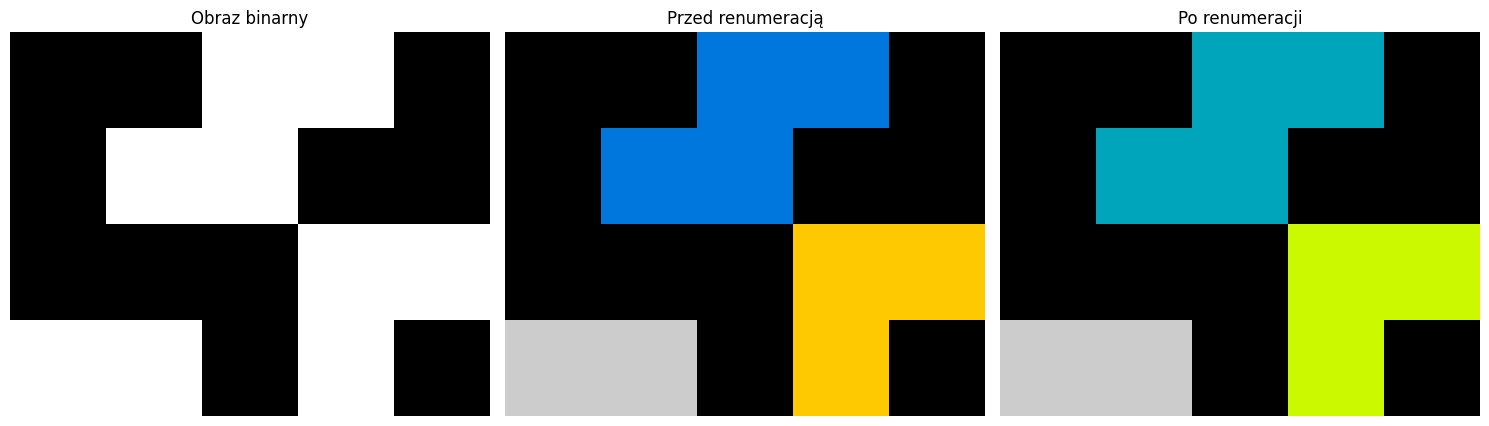

In [54]:
print("=== TEST RENUMERACJI ===")
print("\nTest na małym przykładzie (test5):")
print("Etykiety po etapie II:")
print(etykiety_etap2)

etykiety_final, liczba = renumeruj_etykiety(etykiety_etap2)
print("\nEtykiety po renumeracji:")
print(etykiety_final)
print(f"\nLiczba obiektów: {liczba}")
print("Oczekiwany wynik: 1 obiekt (wszystkie piksele połączone)\n")

# Wizualizacja
wyswietl_obrazy([test5, etykiety_etap2, etykiety_final], 
                ['Obraz binarny', 'Przed renumeracją', 'Po renumeracji'],
                ['gray', 'nipy_spectral', 'nipy_spectral'])

### Zadanie 3.4: Funkcja główna

Połącz wszystkie etapy w jedną funkcję.

In [55]:
def connected_components(obraz_binarny):
    """
    Algorytm obiektów połączonych (Connected Components Labeling).
    
    Args:
        obraz_binarny: tablica 2D z wartościami 0 lub 1
    
    Returns:
        etykiety: tablica 2D z etykietami obiektów
        liczba_obiektow: liczba znalezionych obiektów
    """
    # TODO: Wywołaj etap 1
    etykiety_tmp = etap1_etykietowanie(obraz_binarny)
    
    # TODO: Wywołaj etap 2
    etykiety_final = etap2_tablica_korelacji(etykiety_tmp)
    
    # TODO: Renumeruj etykiety
    etykiety, liczba = renumeruj_etykiety(etykiety_final)
    
    return etykiety, liczba

#### Test Zadania 3.4

=== TEST FUNKCJI GŁÓWNEJ ===

Test 1: Dwa oddzielne prostokąty
Znaleziono 2 obiektów (oczekiwane: 2)

Test 2: Kształt L
Znaleziono 1 obiektów (oczekiwane: 1)

Test 3: Obiekt z mostem
Znaleziono 1 obiektów (oczekiwane: 1)



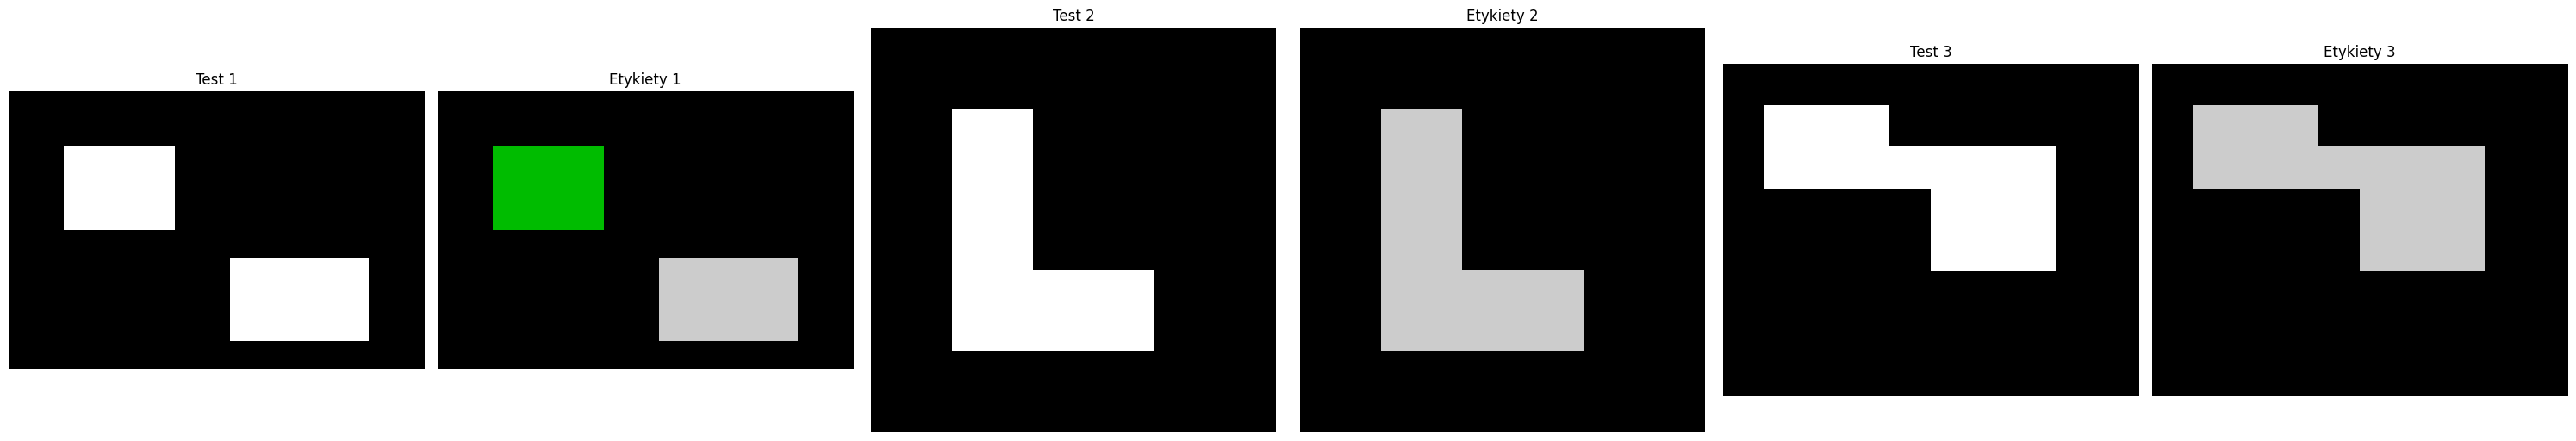

In [56]:
print("=== TEST FUNKCJI GŁÓWNEJ ===")
print("\nTest 1: Dwa oddzielne prostokąty")
etykiety_t1, liczba_t1 = connected_components(test1)
print(f"Znaleziono {liczba_t1} obiektów (oczekiwane: 2)\n")

print("Test 2: Kształt L")
etykiety_t2, liczba_t2 = connected_components(test2)
print(f"Znaleziono {liczba_t2} obiektów (oczekiwane: 1)\n")

print("Test 3: Obiekt z mostem")
etykiety_t3, liczba_t3 = connected_components(test3)
print(f"Znaleziono {liczba_t3} obiektów (oczekiwane: 1)\n")

# Wizualizacja
wyswietl_obrazy([test1, etykiety_t1, test2, etykiety_t2, test3, etykiety_t3], 
                ['Test 1', 'Etykiety 1', 'Test 2', 'Etykiety 2', 'Test 3', 'Etykiety 3'],
                ['gray', 'nipy_spectral', 'gray', 'nipy_spectral', 'gray', 'nipy_spectral'])

### Zadanie 3.5 (opcjonalne): Wizualizacja kolorowa

In [57]:
def wizualizuj_obiekty(etykiety, liczba_obiektow):
    """
    Kolorowa wizualizacja obiektów.
    
    Args:
        etykiety: tablica 2D z etykietami
        liczba_obiektow: liczba obiektów
    
    Returns:
        obraz_rgb: tablica 3D (RGB)
    """
    rows, cols = etykiety.shape
    obraz_rgb = np.zeros((rows, cols, 3), dtype=np.uint8)
    
    # TODO: Wygeneruj losowe kolory dla każdego obiektu
    np.random.seed(42)
    kolory = np.random.randint(50, 255, size=(liczba_obiektow + 1, 3), dtype=np.uint8)
    kolory[0] = [0, 0, 0]  # tło = czarne
    
    # TODO: Przypisz kolory
    for j in range(rows):
        for i in range(cols):
            obraz_rgb[j][i] = kolory[etykiety[j][i]]
    
    return obraz_rgb

#### Test Zadania 3.5

=== TEST WIZUALIZACJI KOLOROWEJ ===
Test 4 (PDF): Znaleziono 4 obiektów



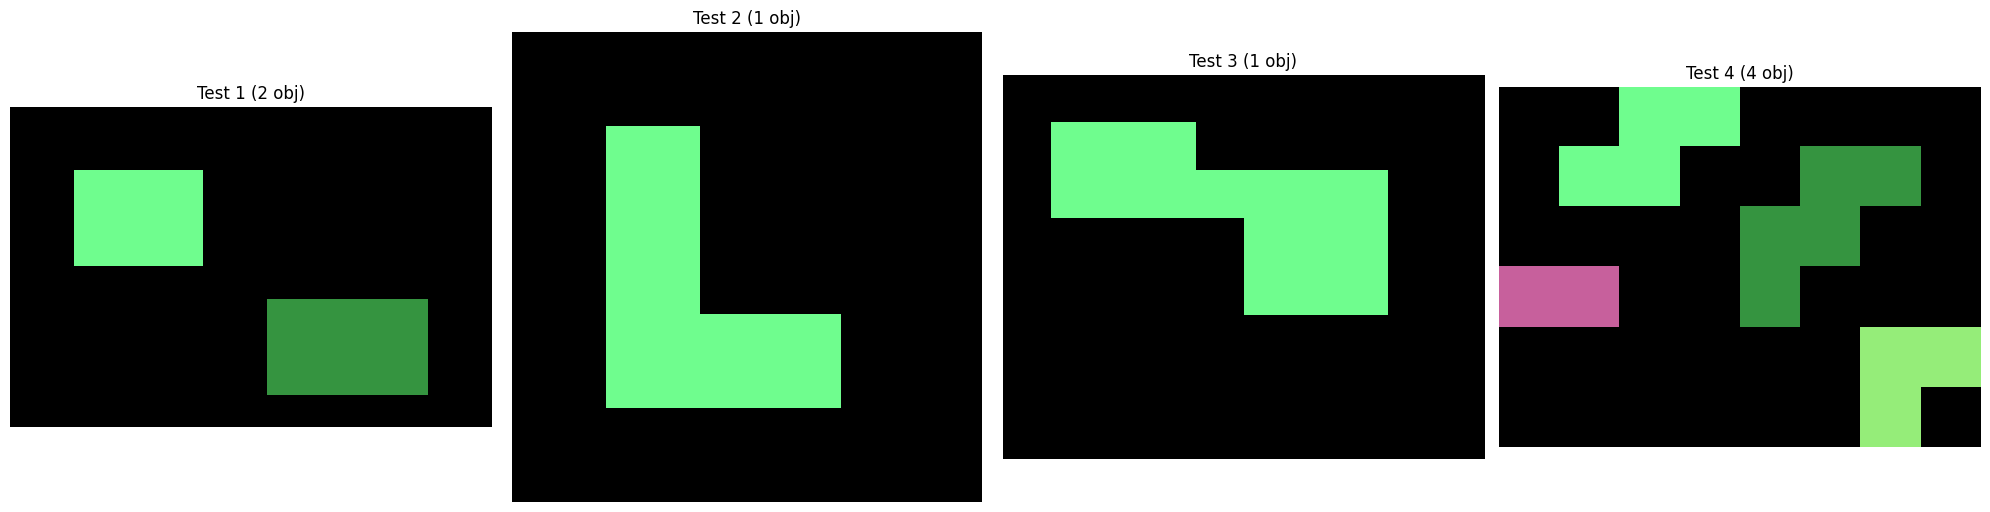

In [58]:
print("=== TEST WIZUALIZACJI KOLOROWEJ ===")

# Test na przykładzie z PDF
etykiety_t4, liczba_t4 = connected_components(test4)
print(f"Test 4 (PDF): Znaleziono {liczba_t4} obiektów\n")

obraz_kol_t4 = wizualizuj_obiekty(etykiety_t4, liczba_t4)

# Wizualizacja wszystkich testów
obraz_kol_t1 = wizualizuj_obiekty(etykiety_t1, liczba_t1)
obraz_kol_t2 = wizualizuj_obiekty(etykiety_t2, liczba_t2)
obraz_kol_t3 = wizualizuj_obiekty(etykiety_t3, liczba_t3)

wyswietl_obrazy([obraz_kol_t1, obraz_kol_t2, obraz_kol_t3, obraz_kol_t4], 
                [f'Test 1 ({liczba_t1} obj)', f'Test 2 ({liczba_t2} obj)', 
                 f'Test 3 ({liczba_t3} obj)', f'Test 4 ({liczba_t4} obj)'])

---
## Sekcja 4: Testy finalne

### Test kompleksowy: Przykład z instrukcji

=== TEST KOMPLEKSOWY: Przykład z PDF ===

Obraz binarny:
[[0 0 1 1 0 0 0 0]
 [0 1 1 0 0 1 1 0]
 [0 0 0 0 1 1 0 0]
 [1 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0]]

Etykiety po etapie I:
[[0 0 1 1 0 0 0 0]
 [0 2 2 0 0 3 3 0]
 [0 0 0 0 4 4 0 0]
 [5 5 0 0 4 0 0 0]
 [0 0 0 0 0 0 6 6]
 [0 0 0 0 0 0 6 0]]

Etykiety po etapie II:
[[0 0 1 1 0 0 0 0]
 [0 1 1 0 0 3 3 0]
 [0 0 0 0 3 3 0 0]
 [5 5 0 0 3 0 0 0]
 [0 0 0 0 0 0 6 6]
 [0 0 0 0 0 0 6 0]]

Etykiety finalne:
[[0 0 1 1 0 0 0 0]
 [0 1 1 0 0 2 2 0]
 [0 0 0 0 2 2 0 0]
 [3 3 0 0 2 0 0 0]
 [0 0 0 0 0 0 4 4]
 [0 0 0 0 0 0 4 0]]

Liczba obiektów: 4



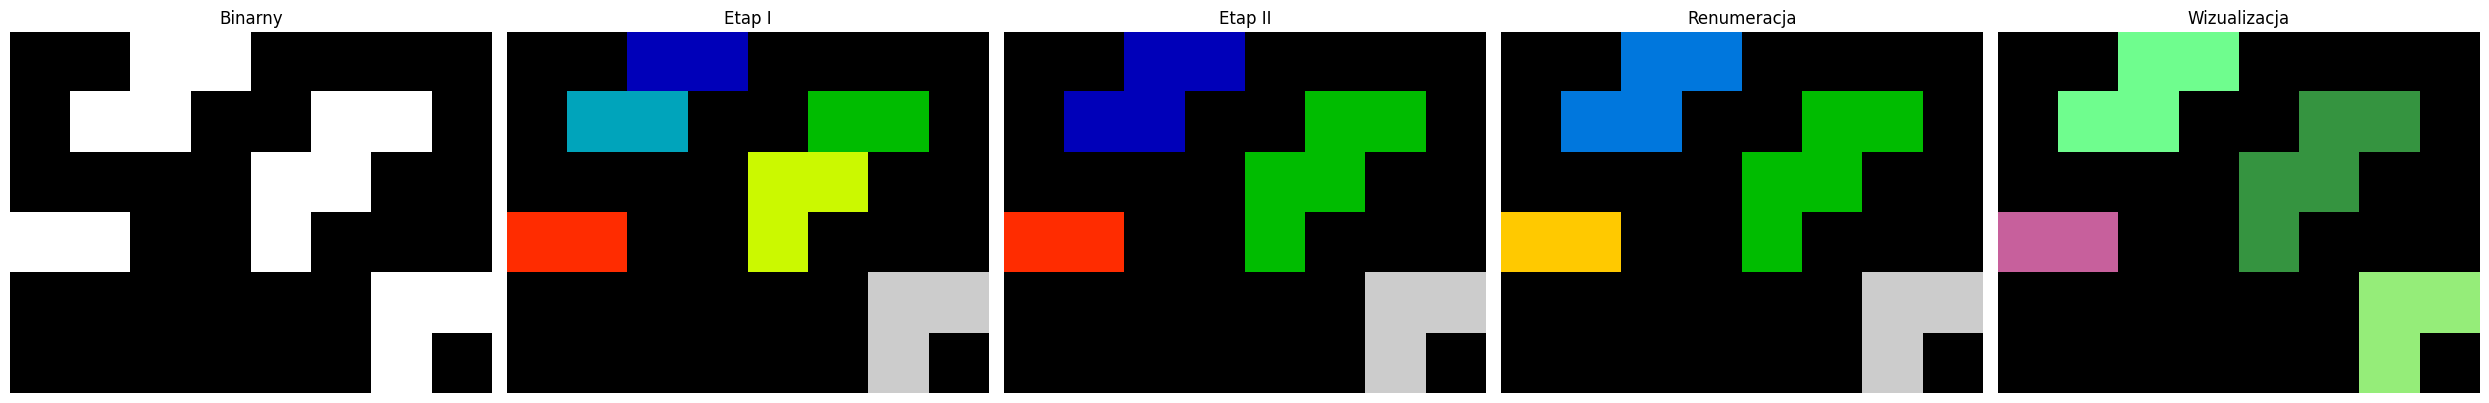

In [59]:
print("=== TEST KOMPLEKSOWY: Przykład z PDF ===")
print("\nObraz binarny:")
print(test4)

# Etap I
etykiety_pdf_etap1 = etap1_etykietowanie(test4)
print("\nEtykiety po etapie I:")
print(etykiety_pdf_etap1)

# Etap II
etykiety_pdf_etap2 = etap2_tablica_korelacji(etykiety_pdf_etap1)
print("\nEtykiety po etapie II:")
print(etykiety_pdf_etap2)

# Renumeracja
etykiety_pdf_final, liczba_pdf = renumeruj_etykiety(etykiety_pdf_etap2)
print("\nEtykiety finalne:")
print(etykiety_pdf_final)
print(f"\nLiczba obiektów: {liczba_pdf}\n")

# Wizualizacja krok po kroku
obraz_kol_pdf = wizualizuj_obiekty(etykiety_pdf_final, liczba_pdf)
wyswietl_obrazy([test4, etykiety_pdf_etap1, etykiety_pdf_etap2, etykiety_pdf_final, obraz_kol_pdf], 
                ['Binarny', 'Etap I', 'Etap II', 'Renumeracja', 'Wizualizacja'],
                ['gray', 'nipy_spectral', 'nipy_spectral', 'nipy_spectral', None])

### Test: Własny obraz

Wczytaj własny obraz, zbinaryzuj i znajdź obiekty.

In [37]:
# Przykład użycia z własnym obrazem (odkomentuj i podaj ścieżkę)

# obraz = wczytaj_obraz('sciezka/do/obrazu.jpg')
# obraz_szary = rgb_do_szarosci(obraz)
# obraz_binarny = binaryzacja(obraz_szary, prog=128)
# etykiety, liczba = connected_components(obraz_binarny)
# print(f"Znaleziono {liczba} obiektów")

# obraz_wynik = wizualizuj_obiekty(etykiety, liczba)
# wyswietl_obrazy([obraz, obraz_binarny, obraz_wynik], 
#                 ['Oryginał', 'Binarny', f'Obiekty ({liczba})'],
#                 [None, 'gray', None])

### Test: Porównanie wszystkich przykładów

=== PODSUMOWANIE WSZYSTKICH TESTÓW ===
Test 1 (dwa prostokąty):     2 obiektów (oczekiwane: 2)
Test 2 (kształt L):          1 obiektów (oczekiwane: 1)
Test 3 (most):               1 obiektów (oczekiwane: 1)
Test 4 (PDF):                4 obiektów
Test 5 (mały przykład):      3 obiektów (oczekiwane: 1)


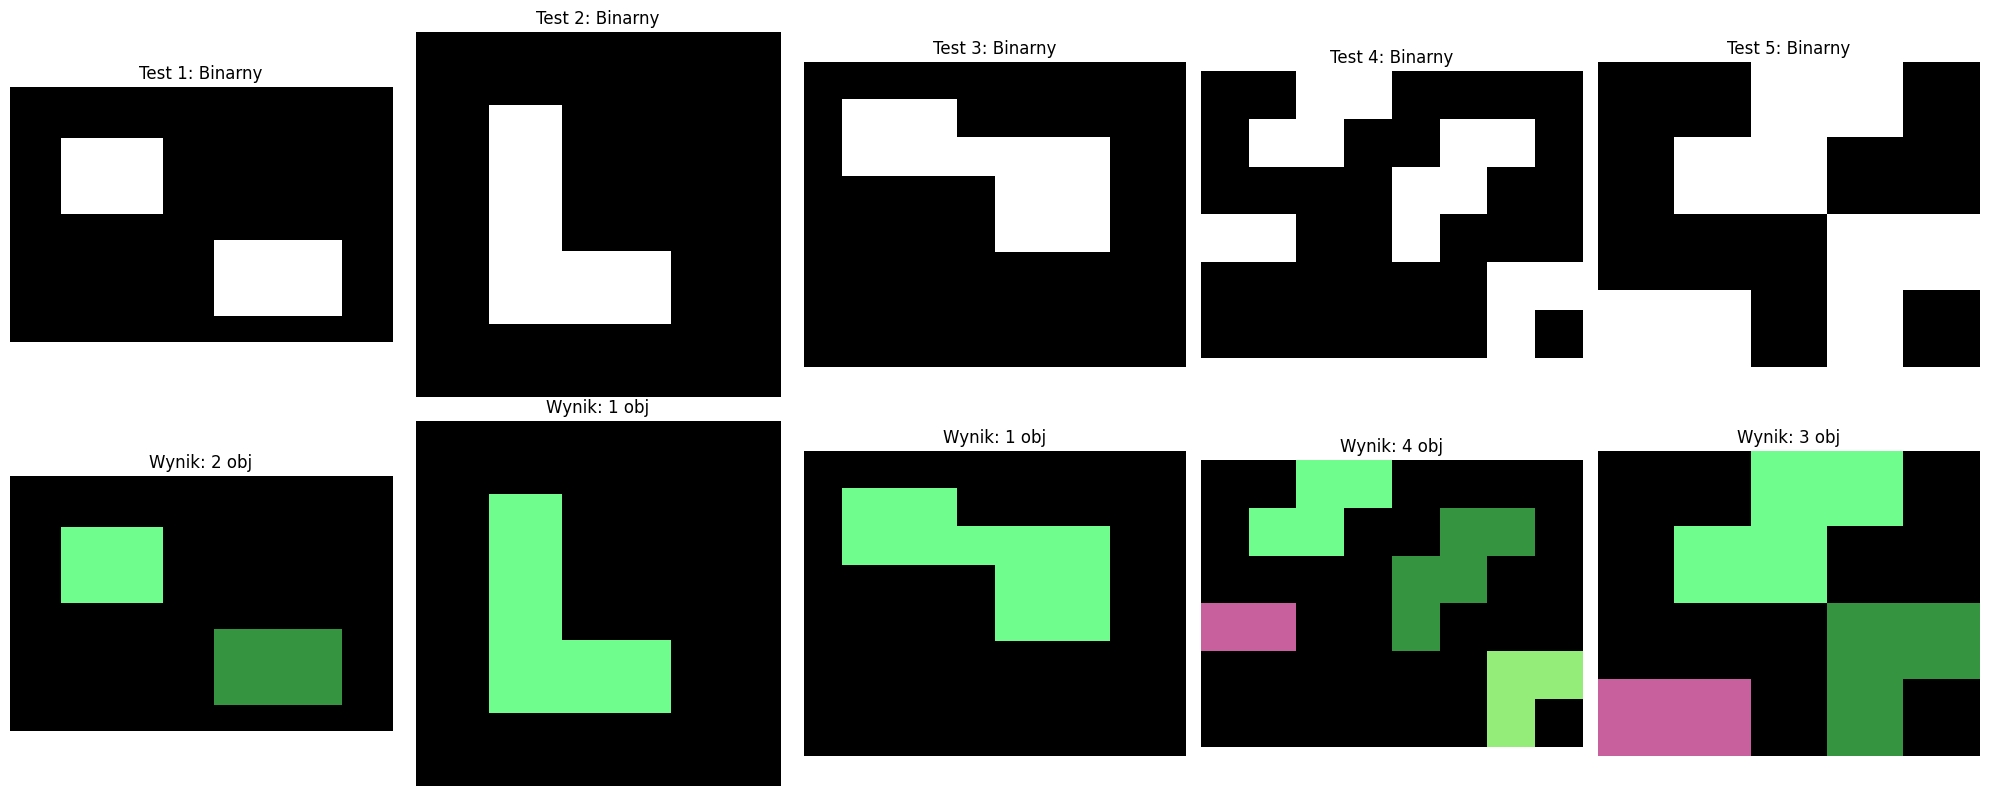

In [60]:
print("=== PODSUMOWANIE WSZYSTKICH TESTÓW ===")
print(f"Test 1 (dwa prostokąty):     {liczba_t1} obiektów (oczekiwane: 2)")
print(f"Test 2 (kształt L):          {liczba_t2} obiektów (oczekiwane: 1)")
print(f"Test 3 (most):               {liczba_t3} obiektów (oczekiwane: 1)")
print(f"Test 4 (PDF):                {liczba_pdf} obiektów")
print(f"Test 5 (mały przykład):      {liczba} obiektów (oczekiwane: 1)")

# Wizualizacja wszystkich wyników
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Wiersz 1: obrazy binarne
axes[0,0].imshow(test1, cmap='gray')
axes[0,0].set_title('Test 1: Binarny')
axes[0,0].axis('off')

axes[0,1].imshow(test2, cmap='gray')
axes[0,1].set_title('Test 2: Binarny')
axes[0,1].axis('off')

axes[0,2].imshow(test3, cmap='gray')
axes[0,2].set_title('Test 3: Binarny')
axes[0,2].axis('off')

axes[0,3].imshow(test4, cmap='gray')
axes[0,3].set_title('Test 4: Binarny')
axes[0,3].axis('off')

axes[0,4].imshow(test5, cmap='gray')
axes[0,4].set_title('Test 5: Binarny')
axes[0,4].axis('off')

# Wiersz 2: wyniki
axes[1,0].imshow(obraz_kol_t1)
axes[1,0].set_title(f'Wynik: {liczba_t1} obj')
axes[1,0].axis('off')

axes[1,1].imshow(obraz_kol_t2)
axes[1,1].set_title(f'Wynik: {liczba_t2} obj')
axes[1,1].axis('off')

axes[1,2].imshow(obraz_kol_t3)
axes[1,2].set_title(f'Wynik: {liczba_t3} obj')
axes[1,2].axis('off')

axes[1,3].imshow(obraz_kol_pdf)
axes[1,3].set_title(f'Wynik: {liczba_pdf} obj')
axes[1,3].axis('off')

obraz_kol_t5 = wizualizuj_obiekty(etykiety_final, liczba)
axes[1,4].imshow(obraz_kol_t5)
axes[1,4].set_title(f'Wynik: {liczba} obj')
axes[1,4].axis('off')

plt.tight_layout()
plt.show()

---
## Zadania dodatkowe (dla chętnych)

### 1. Statystyki obiektów

In [61]:
def statystyki_obiektow(etykiety, liczba_obiektow):
    """Oblicza pole powierzchni każdego obiektu."""
    # TODO: Dla każdej etykiety 1..liczba_obiektow policz piksele
    statystyki = {}
    for obj in range(1, liczba_obiektow + 1):
        pole = np.sum(etykiety == obj)
        statystyki[obj] = pole
    return statystyki

# Test
stats = statystyki_obiektow(etykiety_t1, liczba_t1)
print("Statystyki dla Test 1:")
for obj, pole in stats.items():
    print(f"  Obiekt {obj}: {pole} pikseli")

Statystyki dla Test 1:
  Obiekt 1: 12 pikseli
  Obiekt 2: 15 pikseli


### 2. Filtrowanie małych obiektów

In [62]:
def filtruj_male_obiekty(etykiety, min_pole):
    """Usuwa obiekty mniejsze niż min_pole pikseli."""
    # TODO: Znajdź obiekty mniejsze niż min_pole i ustaw ich etykiety na 0
    etykiety_filtr = etykiety.copy()
    for obj in np.unique(etykiety):
        if obj > 0:
            pole = np.sum(etykiety == obj)
            if pole < min_pole:
                etykiety_filtr[etykiety == obj] = 0
    return etykiety_filtr

# Test - usuń obiekty < 10 pikseli
# etykiety_filtr = filtruj_male_obiekty(etykiety_t1, min_pole=10)
# wyswietl_obrazy([etykiety_t1, etykiety_filtr], 
#                 ['Przed filtrowaniem', 'Po filtrowaniu'],
#                 ['nipy_spectral', 'nipy_spectral'])

### 3. Środek masy obiektów

In [63]:
def srodek_masy(etykiety, liczba_obiektow):
    """Oblicza współrzędne środka masy każdego obiektu."""
    # TODO: Dla każdego obiektu oblicz średnią współrzędnych
    srodki = {}
    for obj in range(1, liczba_obiektow + 1):
        y_coords, x_coords = np.where(etykiety == obj)
        if len(y_coords) > 0:
            srodki[obj] = (np.mean(x_coords), np.mean(y_coords))
    return srodki

# Test
srodki = srodek_masy(etykiety_t1, liczba_t1)
print("Środki masy dla Test 1:")
for obj, (x, y) in srodki.items():
    print(f"  Obiekt {obj}: ({x:.1f}, {y:.1f})")

Środki masy dla Test 1:
  Obiekt 1: (3.5, 3.0)
  Obiekt 2: (10.0, 7.0)


### 4. Prostokątne obwiednie (bounding boxes)

In [64]:
def bounding_boxes(etykiety, liczba_obiektow):
    """Znajduje prostokątne obwiednie dla każdego obiektu."""
    # TODO: Dla każdego obiektu znajdź min/max współrzędnych
    boxes = {}
    for obj in range(1, liczba_obiektow + 1):
        y_coords, x_coords = np.where(etykiety == obj)
        if len(y_coords) > 0:
            boxes[obj] = {
                'x_min': np.min(x_coords),
                'x_max': np.max(x_coords),
                'y_min': np.min(y_coords),
                'y_max': np.max(y_coords)
            }
    return boxes

# Test
boxes = bounding_boxes(etykiety_t1, liczba_t1)
print("Bounding boxes dla Test 1:")
for obj, box in boxes.items():
    print(f"  Obiekt {obj}: x=[{box['x_min']}, {box['x_max']}], y=[{box['y_min']}, {box['y_max']}]")

Bounding boxes dla Test 1:
  Obiekt 1: x=[2, 5], y=[2, 4]
  Obiekt 2: x=[8, 12], y=[6, 8]


---
**Koniec laboratorium 2**